In [56]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np



%matplotlib inline

## Create dataset

In [2]:
df_media_investment=pd.read_csv(r"/content/drive/MyDrive/data /MMM/MediaInvestment.csv")
df_media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN


In [3]:
df_NPS_score=pd.read_csv(r"/content/drive/MyDrive/data /MMM/MonthlyNPSscore.csv")
df_NPS_score.head()

,Date,NPS
0,7/1/2015,54.6
1,8/1/2015,60.0
2,9/1/2015,46.9
3,10/1/2015,44.4
4,11/1/2015,47.0


In [4]:
df_Product_list=pd.read_csv(r"/content/drive/MyDrive/data /MMM/ProductList.csv")
df_Product_list.head()

,Product,Frequency,Percent
0,\N,5828,0.4
1,AmplifierReceiver,4056,0.2
2,AudioMP3Player,112892,6.8
3,Binoculars,14599,0.9
4,BoomBox,2879,0.2


In [5]:
df_Sales=pd.read_csv(r"/content/drive/MyDrive/data /MMM/Sales.csv", sep="\t")
df_Sales.head()

<ipython-input-5-b2da3231014e>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Sales=pd.read_csv(r"/content/drive/MyDrive/data /MMM/Sales.csv", sep="\t")


,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015 15:11,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015 10:07,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,20-10-2015 15:45,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,14-10-2015 12:05,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,17-10-2015 21:25,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [6]:
df_first_file=pd.read_csv(r"/content/drive/MyDrive/data /MMM/firstfile.csv")
df_first_file.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [7]:
df_second_file=pd.read_csv(r"/content/drive/MyDrive/data /MMM/Secondfile.csv")
df_second_file.head()

,Unnamed: 0,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,...,Digital,Sponsorship,Content.Marketing,Online.marketing,Affiliates,SEM,Radio,Other,Date,NPS
0,1,Jan 2016,1.869358e+08,2.638743e+07,1.093020e+08,1.688487e+07,4.770016e+07,3.872102e+08,10442,22525,...,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,2016-01-01,47.1
1,2,Feb 2016,1.549989e+08,2.536880e+07,1.011725e+08,1.510002e+07,3.561454e+07,3.322547e+08,8606,25406,...,19000000.0,117000000.0,6000000.0,199000000.0,65000000.0,49000000.0,NaN,NaN,2016-02-01,50.3
2,3,Mar 2016,1.861417e+08,2.676195e+07,1.202884e+08,2.299259e+07,4.802562e+07,4.042102e+08,9969,25484,...,21000000.0,416000000.0,4000000.0,184000000.0,62000000.0,52000000.0,9000000.0,159000000.0,2016-03-01,49.0
3,4,Apr 2016,1.470531e+08,2.534451e+07,9.808951e+07,2.081085e+07,4.848195e+07,3.397800e+08,8006,25926,...,9000000.0,243000000.0,0.0,165000000.0,57000000.0,42000000.0,NaN,NaN,2016-04-01,51.8
4,5,May 2016,1.844336e+08,3.052432e+07,1.104899e+08,2.434611e+07,5.967982e+07,4.094737e+08,9419,28820,...,8000000.0,317000000.0,8000000.0,237000000.0,68000000.0,69000000.0,11000000.0,50000000.0,2016-05-01,47.3


## EDA

## lets dive into the value this each dataset has

In [8]:
# Impute NAN values with 0
df_media_investment=df_media_investment.fillna(0)
df_Sales=df_Sales.fillna(0)
df_first_file=df_first_file.fillna(0)
df_second_file=df_second_file.fillna(0)

## Checking for the NPS (Net promoter Score) score distribution over the years

<Axes: xlabel='Date', ylabel='NPS'>

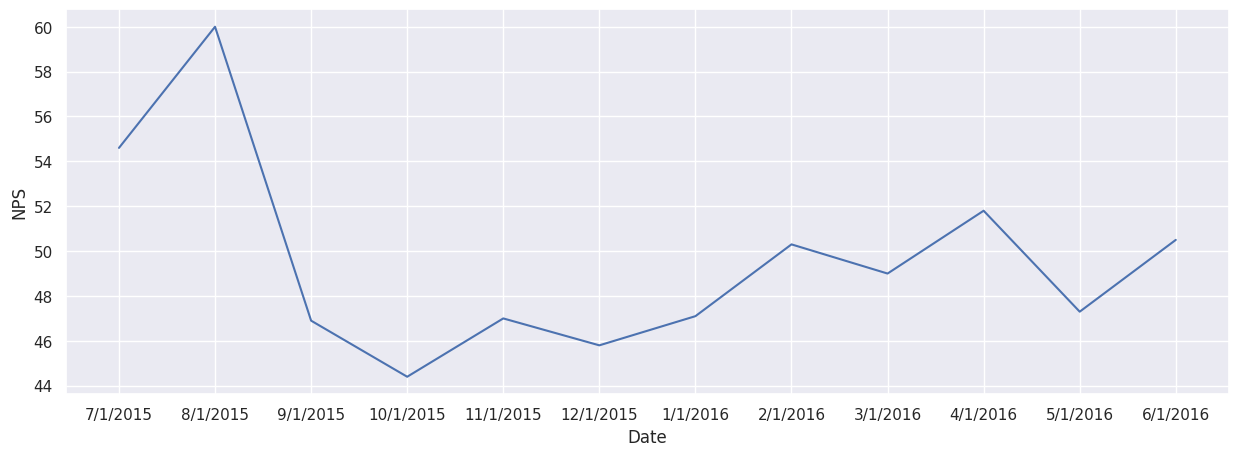

In [9]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(df_NPS_score, x="Date", y="NPS")

In [10]:
# Custom function to plot bar graph df & drop redundant columns
def hist_plot(df, x=None):
  b=['date', 'Date','Month','Year','Unnamed:0', 'month']
  a=[i for i in df.columns if i not in b ]
  df=df[a]
  fig = plt.figure(figsize = (8,10))
  ax = fig.gca()
  df.hist(ax=ax, color = "skyblue")
  plt.show()

<ipython-input-10-edb4c6d6a170>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, color = "skyblue")


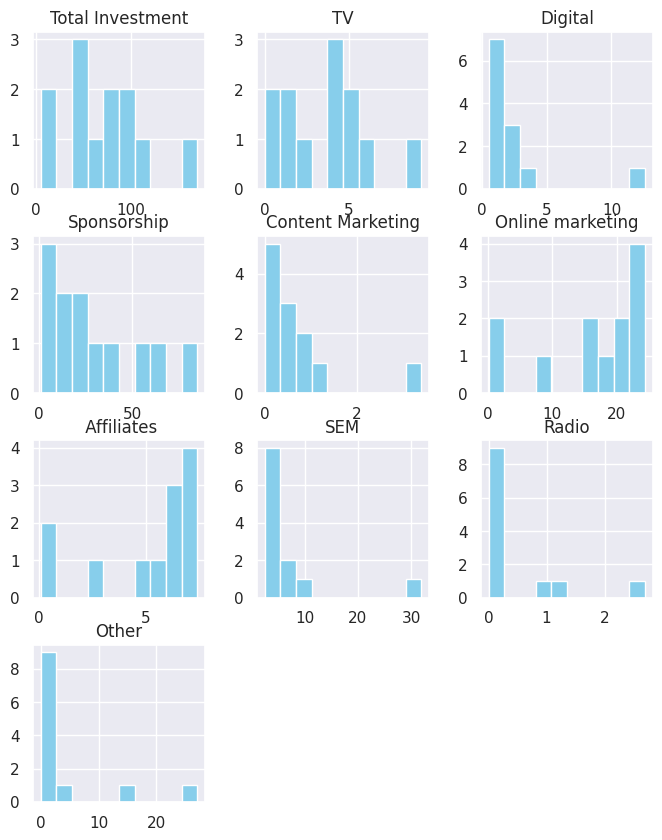

In [11]:
# plotting hist for media investment
hist_plot(df_media_investment)

#### We can see that highest spending bracket is for online marketing while lowest spending is for Radio.

### Checking the year wise contribution of each channel to total investment

In [12]:
def calculate_percentages_investment(df):
  c=[]
  for j in (0,1):
    b=[]
    for i in range(1,len(df.columns)):
      b.append(round((df.iloc[j,i]/df.iloc[j,0])*100,2))
    c.append(b)
  return (c)

In [13]:
df=df_media_investment.drop(columns=["Month"])
df=df.groupby(df.Year).sum()
data=calculate_percentages_investment(df)
columns=['TV %', 'Digital %', 'Sponsorship %', 'Content Marketing %',
       'Online marketing %', ' Affiliates %', 'SEM %', 'Radio %', 'Other %']
af=pd.DataFrame(data, columns=columns, index=[2015,2016])
af

,TV %,Digital %,Sponsorship %,Content Marketing %,Online marketing %,Affiliates %,SEM %,Radio %,Other %
2015,4.43,4.97,50.81,1.19,18.88,5.82,13.88,0.00,0.0
2016,6.15,1.90,34.62,0.68,27.35,8.85,7.28,1.18,12.0


We can see that there is steep increase in Affiliates, online marketing, Other , Radio forms of adverstising while there is a steep decrease in TV, Digital, Sponsorship, SEM, Content Marketing in the year 2016 as compared to 2015.


What we can do further is to check the profitability , revenue & cost distribution for each of this channel in both year.

In [14]:
df_second_file=df_second_file.sort_values(by=["Date"])

<Axes: xlabel='Date', ylabel='total_gmv'>

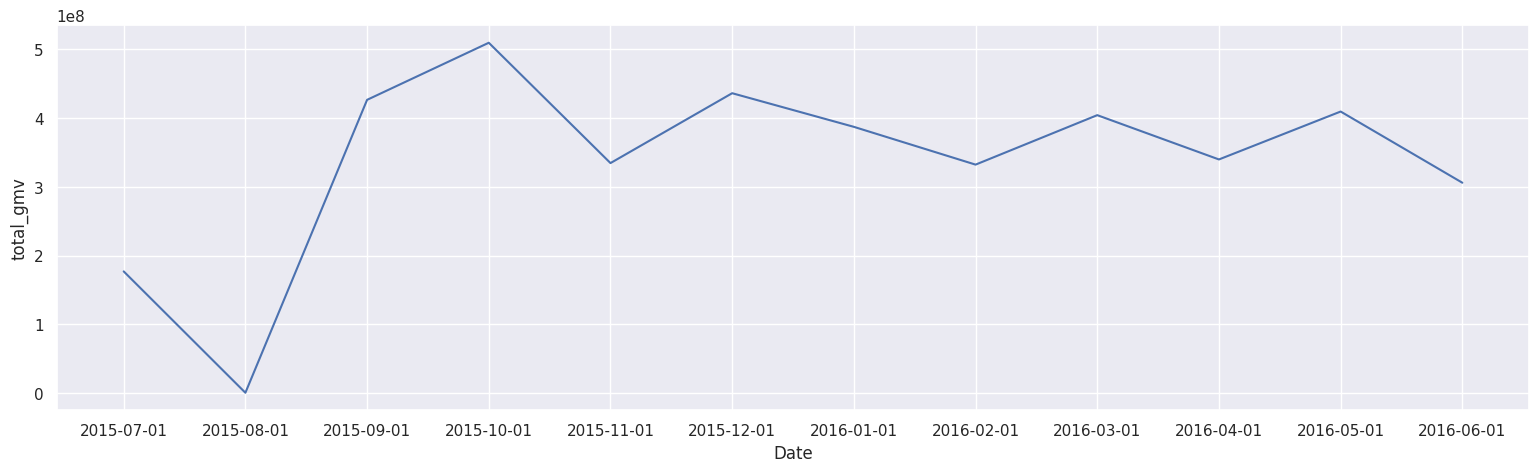

In [15]:
sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(df_second_file, x='Date', y='total_gmv')

<Axes: xlabel='Date', ylabel='total_Units'>

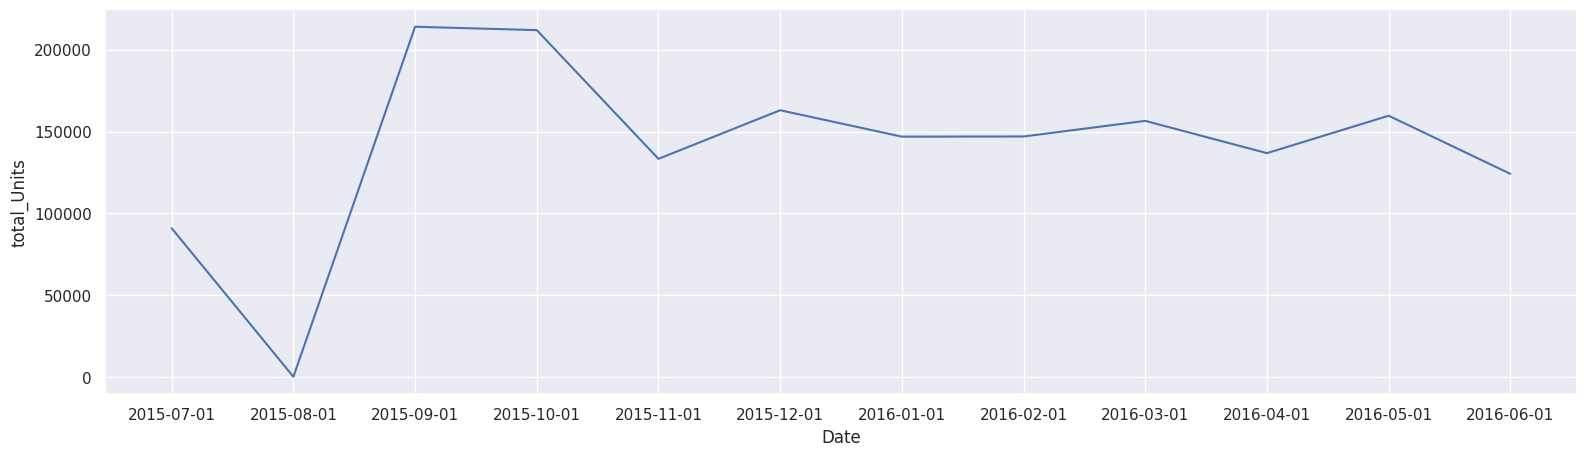

In [16]:
sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(df_second_file, x='Date', y='total_Units')

<Axes: xlabel='Date', ylabel='Total.Investment'>

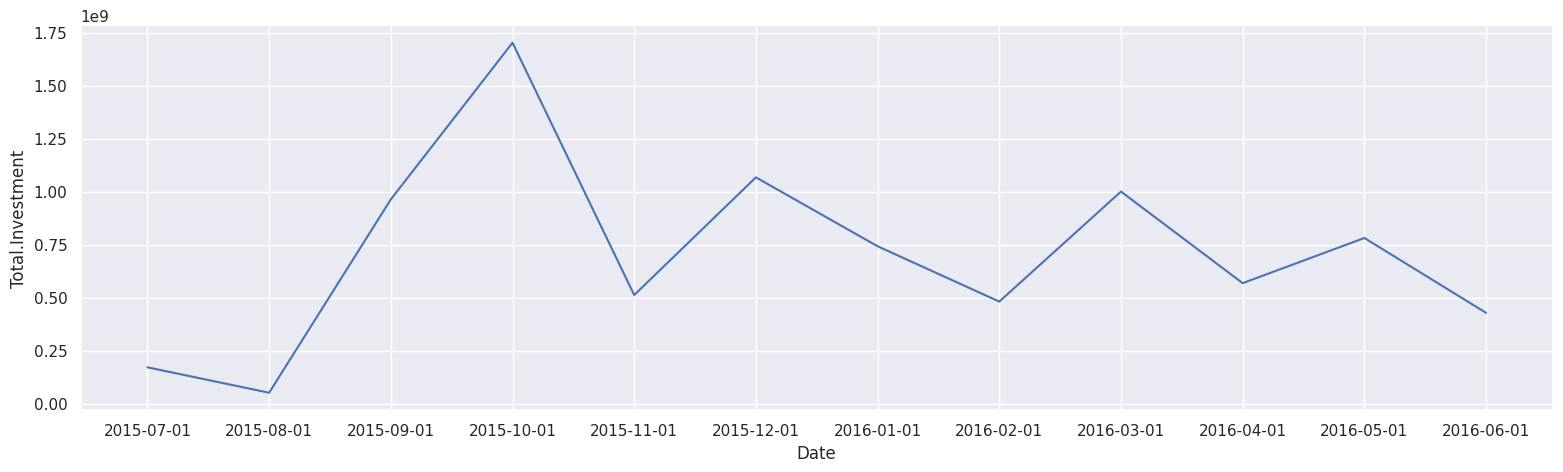

In [17]:
sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(df_second_file, x='Date', y='Total.Investment')

In [18]:
## Checking the Total quantity sold in 2015 & 2016

a=df_second_file.loc[df_second_file['Date']<"2016-01-01",["total_Units"]].sum().values
b=df_second_file.loc[df_second_file['Date']>"2016-01-01",["total_Units"]].sum().values
c=((a-b)/a)*100

print("The totat number of items sold in 2015 is {0} and 2016 is {1} and percentage change (decrease) is {2}".format(a,b,c))

The totat number of items sold in 2015 is [813526] and 2016 is [724195] and percentage change (decrease) is [10.9807185]


In [19]:
## Checking the Total quantity sold in 2015 & 2016

a=df_second_file.loc[df_second_file['Date']<"2016-01-01",["Total.Investment"]].sum().values
b=df_second_file.loc[df_second_file['Date']>"2016-01-01",["Total.Investment"]].sum().values
c=((a-b)/a)*100

print("The totat investment in marketing channel in 2015 is {0} and 2016 is {1} and percentage change (decrease) is {2}".format(a,b, c))

The totat investment in marketing channel in 2015 is [4.466e+09] and 2016 is [3.258e+09] and percentage change (decrease) is [27.04881326]


##### The data is very less to compare the trends but we can see that the units sold in 2015 for last 6 months are more than in first six months of the 2016. This Change can be attributed to media channel changed funding strategy.We can see that as the investment have decreased by 20 % there is 10% change in units sold. There we current strategy can be said is effective as we are saving expenses in medial advertising. What we need to check is what kind of products category are been affected by this shift in method. Also, check for monthly variation in investment & units sold. 

#### We had observed that there is change in investment policy for marketing channel as compared to 2015 in 2016. 

<Axes: >

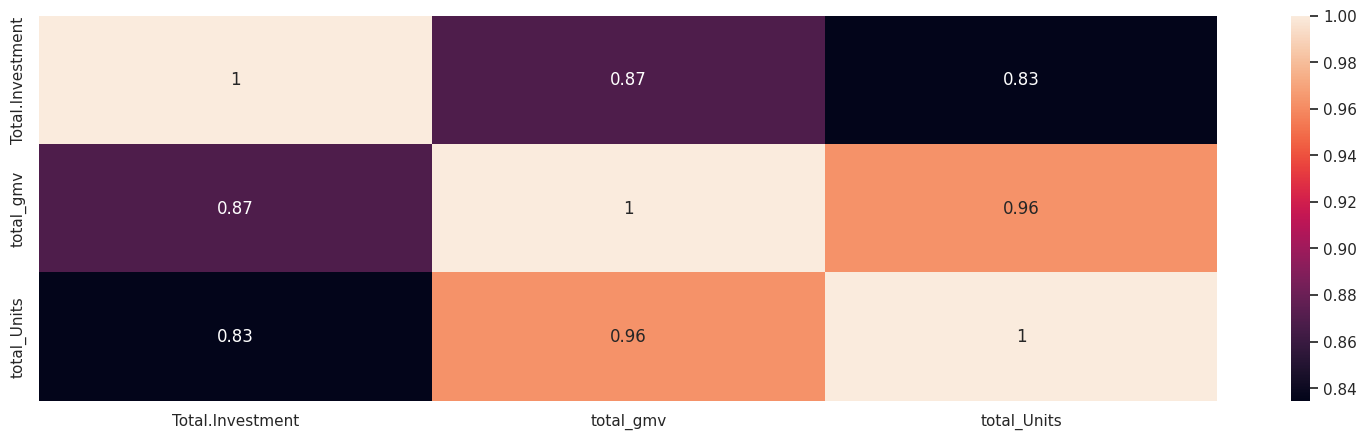

In [20]:
sns.heatmap(df_second_file[['Total.Investment','total_gmv', 'total_Units']].corr(), annot=True)

What we can infer is that based on above metrics as we increase the investment there is a significant effect in the units sold as well as the profit earned. There is a linear relationship between investment and units sold.

<Axes: xlabel='Total.Investment', ylabel='total_Units'>

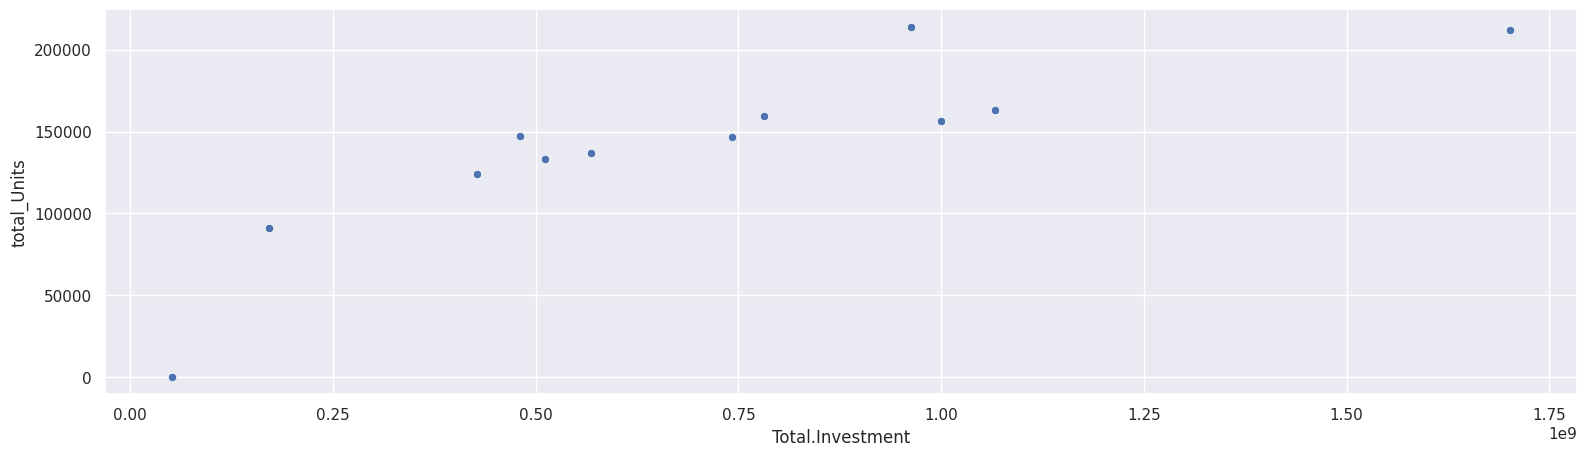

In [21]:
sns.scatterplot(x=df_second_file['Total.Investment'], y=df_second_file['total_Units'])

##### There is a linear relationship between the total investment & Units sold. Therefore we can say that the positive increase in investment of advertising will increase the sales. But we need to further build a casual model to check if this relationship holds true.


## Building a Causal Impact Model

In [29]:
!pip install pycausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from causalimpact import CausalImpact

In [41]:
# We will consider the Dec 2015 to be the cutoff period for pre and post period analysis
df=pd.concat([df_second_file['Date'],df_second_file['Total.Investment'],df_second_file['total_Units']], axis=1)
df=df.set_index('Date')
df

,Total.Investment,total_Units
Date,,
2015-07-01,1.710000e+08,90938
2015-08-01,5.100000e+07,275
2015-09-01,9.630000e+08,214008
2015-10-01,1.702000e+09,211939
2015-11-01,5.120000e+08,133345
2015-12-01,1.067000e+09,163021
2016-01-01,7.420000e+08,146899
2016-02-01,4.810000e+08,146990
2016-03-01,1.000000e+09,156527


In [43]:
# Print out the time series start date
print(f'The time-series start date is :{df.index.min()}')
# Print out the time series end date
print(f'The time-series end date is :{df.index.max()}')
# Print out the intervention start date
print(f'The treatment start date is :{df.index[6]}')

The time-series start date is :2015-07-01
The time-series end date is :2016-06-01
The treatment start date is :2016-01-01


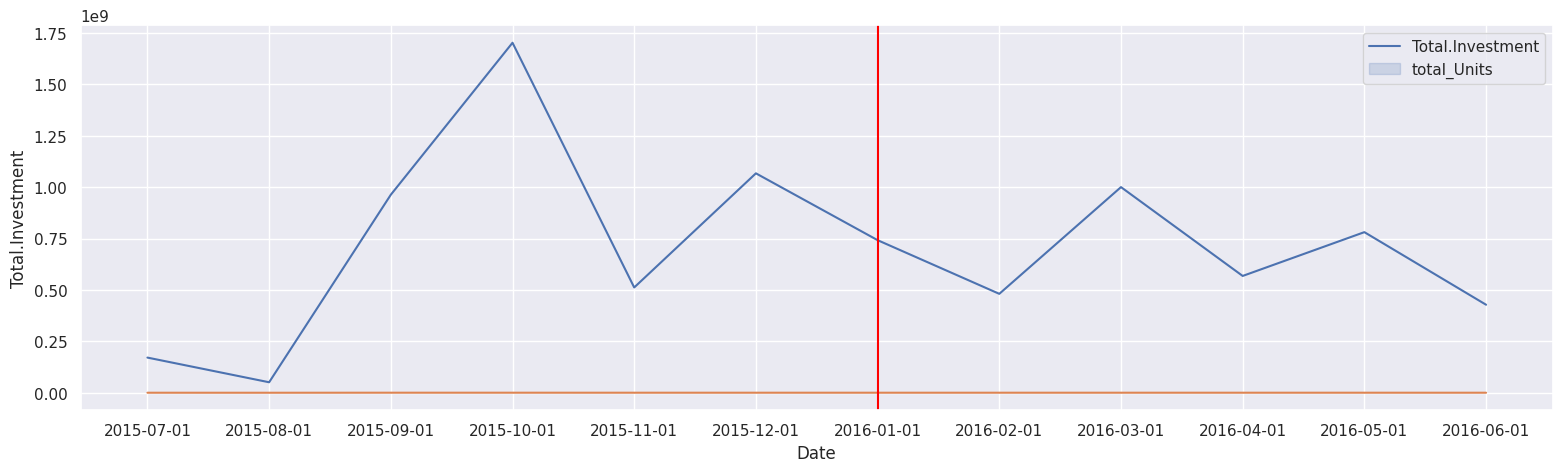

In [47]:
# Lets Visualize the time series data

sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(x=df.index, y=df['Total.Investment'])
sns.lineplot(x=df.index, y=df['total_Units'])
plt.axvline(x= df.index[6], color='red')
plt.legend(labels = ['Total.Investment', 'total_Units'])

In [48]:
# Set pre-period
pre_period = [str(df.index.min())[:10], str(df.index[5])[:10]]
# Set post-period
post_period = [str(df.index[6])[:10], str(df.index.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2015-07-01', '2015-12-01']
The post-period is ['2016-01-01', '2016-06-01']


In [49]:
# We will calculate the Raw Difference between the pre and the post periods.

# Calculate the pre-daily average
pre_daily_avg = df['total_Units'][:6].mean()
# Calculate the post-daily average
post_daily_avg = df['total_Units'][6:].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is 135587.66666666666.
The post-treatment daily average is 145182.33333333334.
The raw difference between the pre and the post treatment is 9594.666666666686.


####  We can see that the pre-treatment daily average is 135587.66, the post-treatment daily average is 145182.3, and the raw difference between the pre and the post treatment is 9594.66, which is much higher than the true causal impact of 10. 
#### Without causality analysis, we will overestimate the causal impact.

### Causal Impact Analysis on Time Series

#### The causality analysis has two assumptions:

Assumption 1: There are one or more control time series that are highly correlated with the response variable, but not impacted by the intervention. Violation of this assumption can result in wrong conclusions about the existence, the direction, or the magnitude of the treatment effect.

Assumption 2: The correlation between the control and the response time series is the same for pre and post intervention.

#### The python CausalImpact package has a function called CausalImpact that implements a Bayesian Structural Time Series Model (BSTS) on the backend. It has three required inputs:

a) data takes the python dataframe name.

b) pre_period takes the starting and the ending index values for the pre-intervention period.

c) post_period takes the starting and the ending index values for the post-intervention period.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


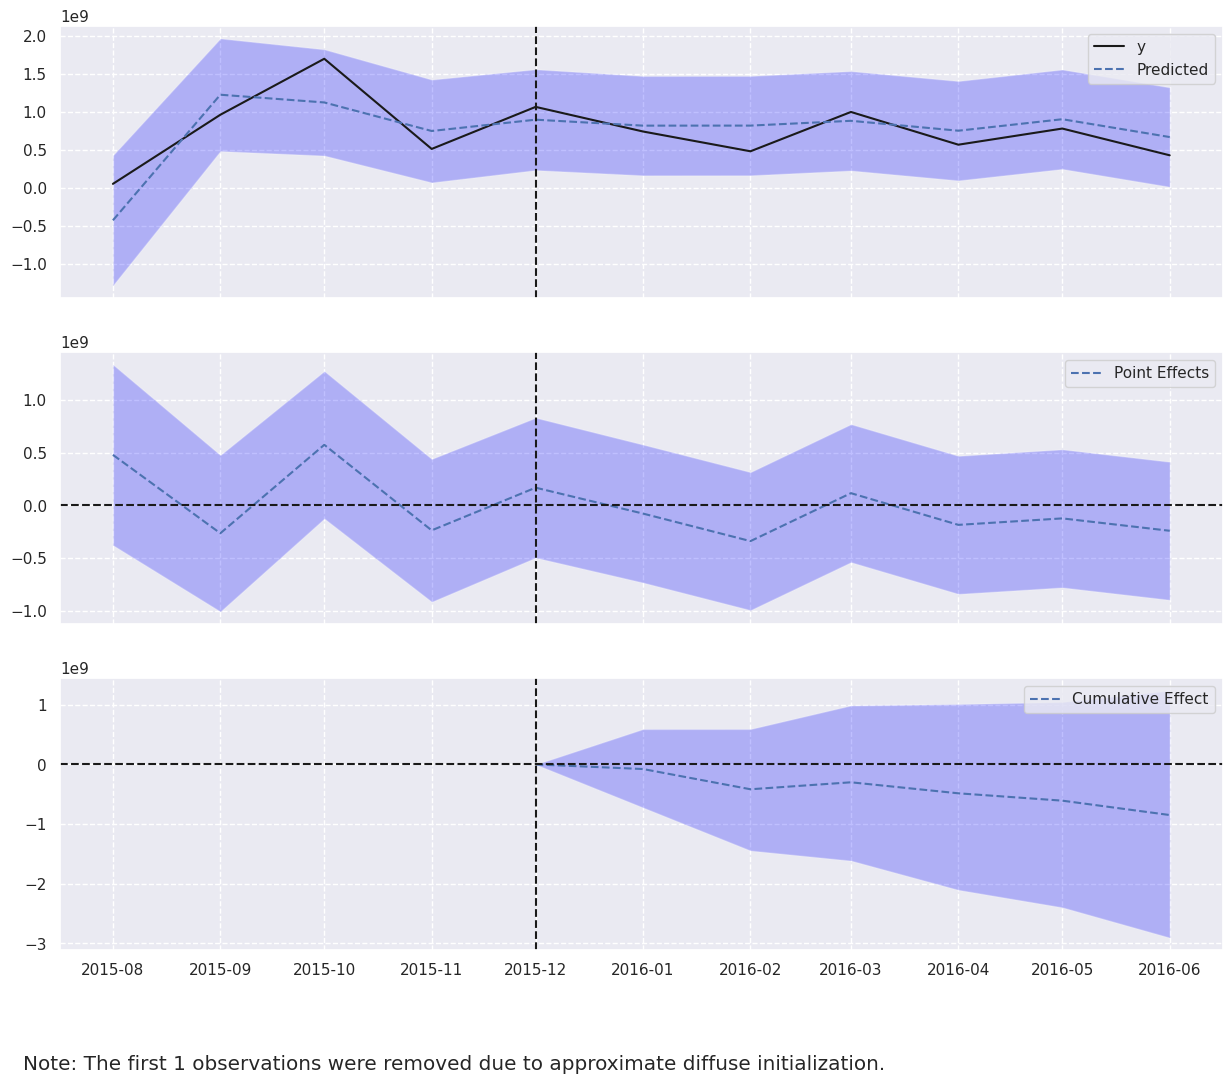

In [50]:
# Causal impact model
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

In [51]:
# Causal impact summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    666666666.67       4000000000.0
Prediction (s.d.)         808016910.37 (175991366.37)4848101462.2 (1055948198.24)
95% CI                    [460526684.17, 1150400163.54][2763160105.02, 6902400981.22]

Absolute effect (s.d.)    -141350243.7 (175991366.37)-848101462.2 (1055948198.24)
95% CI                    [-483733496.87, 206139982.5][-2902400981.22, 1236839894.98]

Relative effect (s.d.)    -17.49% (21.78%)   -17.49% (21.78%)
95% CI                    [-59.87%, 25.51%]  [-59.87%, 25.51%]

Posterior tail-area probability p: 0.21
Posterior prob. of a causal effect: 78.62%

For more details run the command: print(impact.summary('report'))


In [52]:
# Causal impact report
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 666666666.67. In the absence of an
intervention, we would have expected an average response of 808016910.37.
The 95% interval of this counterfactual prediction is [460526684.17, 1150400163.54].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -141350243.7 with a 95% interval of
[-483733496.87, 206139982.5]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4000000000.0.
Had the intervention not taken place, we would have expected
a sum of 4848101462.2. The 95% interval of this prediction is [2763160105.02, 6902400981.22].


The above results are given in terms of absolu

### As the Caussal Impact model has given us the decision with CI of 78.2 %, we can say that there is no relation between the investment made and actual change in volume sold. But we also need to verify it once more rather than making a errorneous assumption.

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests

#### Checking the stationarity of time series using KPSS and ADF test

In [61]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [62]:
print('KPSS Test: Total Units series')
kpss_test(df['total_Units'])

KPSS Test: Total Units series
KPSS Statistic: 0.14210787901129968
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


In [63]:
print('KPSS Test: Total Investment series')
kpss_test(df['Total.Investment'])

KPSS Test: Total Investment series
KPSS Statistic: 0.112680444607629
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


#### As both the series have p value less than 0.05, we can say that time series are stationary so we can proceed with the granger casuality.

In [64]:
maxlag=2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,Total.Investment_x,total_Units_x
Total.Investment_y,1.0000,0.0001
total_Units_y,0.0012,1.0000


#### Here, there is a strange observation that is deviating from the bayesian strutural causal impact model that is p value is less than 0.05 for investment as a causation for total units.Therefore we can say that there is no clear conclusion in terms of Casuality as of now. Any other test can also be exxplored.

### Lets check the total number of different products

In [23]:
df_Product_list.nunique()

Product      75
Frequency    71
Percent      27
dtype: int64

We have total of 75 different product

A steep drop in NPS Score means that the brand is loosing its value.

<Axes: xlabel='Percent', ylabel='Product'>

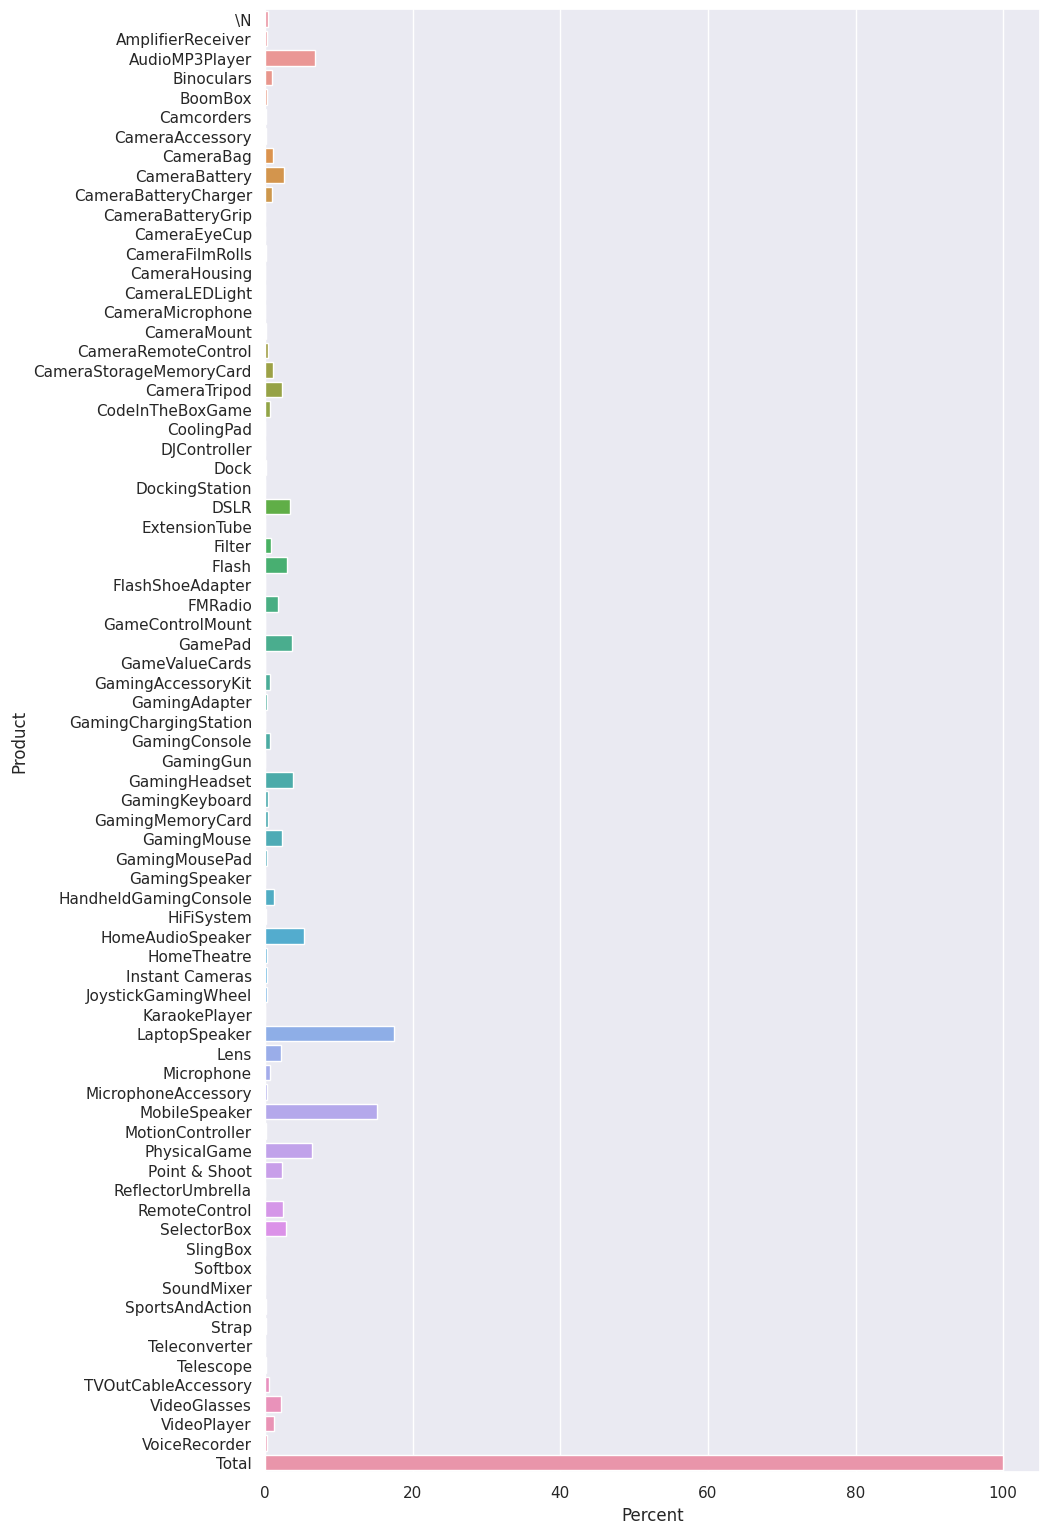

In [24]:
# Checking the 
df_Product_list['Product']=df_Product_list['Product'].astype('str')
df_Product_list['Percent']=df_Product_list['Percent'].astype('float')

sns.set(rc={'figure.figsize':(10,19)})
sns.barplot(df_Product_list,x="Percent", y="Product", orient='h')

##### We can say that highest share of sell is from Loudspeaker.

## MMM Model:- 

### In this step we will be buidling a MMM model to understand how does the Volume sold for different product is affected by MRP, Discount %, Sales_name. 

In [65]:
df_first_file.head(5)

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [67]:
df_first_file.nunique()

Unnamed: 0             1578079
Date                       360
Sales_name                  13
gmv_new                  12303
units                       27
product_mrp               2580
discount                  9678
product_category             5
product_subcategory         14
product_vertical            72
dtype: int64

### We will be dividing our data in 5 different datasets based on each product category. Our level of analysis will be confined to product subcategory as using each product name will not be helpfull.

In [81]:
df_first_file['product_category'].unique()

array(['EntertainmentSmall', 'GamingHardware', 'CameraAccessory',
       'GameCDDVD', 'Camera'], dtype=object)

In [91]:
# We will drop the Product vertical which basicially means the product name and use product subcategory as a distinct variable in each model. 

df=df_first_file.drop(columns=['product_vertical', 'Unnamed: 0'], axis=1)
df['discount %']=round((df['discount']/df['product_mrp'])*100,2)
df=df.drop(columns=['discount','gmv_new'], axis=1)
df=df.columns

,Date,Sales_name,units,product_mrp,product_category,product_subcategory,discount %
0,2015-07-01,No Promotion,1,3650.0,EntertainmentSmall,HomeAudio,16.71
1,2015-07-01,No Promotion,1,400.0,EntertainmentSmall,Speaker,22.50
2,2015-07-01,No Promotion,1,7999.0,GamingHardware,GamingAccessory,75.01
3,2015-07-01,No Promotion,1,700.0,EntertainmentSmall,TVVideoSmall,80.14
4,2015-07-01,No Promotion,1,700.0,EntertainmentSmall,TVVideoSmall,85.86
...,...,...,...,...,...,...,...
1578074,2016-06-30,No Promotion,1,1299.0,EntertainmentSmall,TVVideoSmall,48.81
1578075,2016-06-30,No Promotion,1,4000.0,EntertainmentSmall,TVVideoSmall,45.25
1578076,2016-06-30,No Promotion,1,4999.0,EntertainmentSmall,TVVideoSmall,50.01
1578077,2016-06-30,No Promotion,1,3999.0,EntertainmentSmall,TVVideoSmall,33.88


## We will be building a pricing optimization model